In [2]:
%load_ext autoreload
%autoreload
import fit_approaches
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import piecewise_regression

In [3]:
ff = fit_approaches.fitting_functions()
tf = fit_approaches.testing_functions()

In [4]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

In [14]:
num_points = 20
num_iter = 10
traj = tf.generate_traj(1)
sampled_pts = tf.sample_traj(traj, num_points) 
alpha, beta_1, beta_2 = ff.get_coeffs(traj[0,1], sampled_pts)
true_coeffs = [beta_1, beta_2, traj[0,1]]
error_y = np.random.normal(0, 0.1, num_points)
sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

c_val_step = 0.01
overall_min = 100000
all_coeff_ests1 = ff.ross_heuristic(sampled_pts, num_iter, c_val_step)
accuracies1 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests1])
all_coeff_ests2 = ff.random_pts_approach(sampled_pts, num_iter, c_val_step)
accuracies2 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests2])
all_coeff_ests3 = ff.optimal_pts_approach(sampled_pts, num_iter, c_val_step, true_coeffs)
accuracies3 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests3])
all_coeff_ests4 = ff.simple_varmin_approach(sampled_pts, num_iter, c_val_step)
accuracies4 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests4])

for i in range(4):
    num_points = 20
    num_iter = 10
    traj = tf.generate_traj(1)
    sampled_pts = tf.sample_traj(traj, num_points) 
    alpha, beta_1, beta_2 = ff.get_coeffs(traj[0,1], sampled_pts)
    true_coeffs = [beta_1, beta_2, traj[0,1]]
    error_y = np.random.normal(0, 0.1, num_points)
    sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

    c_val_step = 0.01
    overall_min = 100000
    all_coeff_ests1 = ff.ross_heuristic(sampled_pts, num_iter, c_val_step)
    accuracies1i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests1])
    accuracies1 = accuracies1 + accuracies1i
    all_coeff_ests2 = ff.random_pts_approach(sampled_pts, num_iter, c_val_step)
    accuracies2i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests2])
    accuracies2 = accuracies2 + accuracies2i
    all_coeff_ests3 = ff.optimal_pts_approach(sampled_pts, num_iter, c_val_step, true_coeffs)
    accuracies3i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests3])
    accuracies3 = accuracies3 + accuracies3i
    all_coeff_ests4 = ff.simple_varmin_approach(sampled_pts, num_iter, c_val_step)
    accuracies4i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests4])
    accuracies4 = accuracies4 + accuracies4i

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

In [15]:
mean_a1 = (accuracies1/5)
mean_a2 = (accuracies2/5)
mean_a3 = (accuracies3/5)
mean_a4 = (accuracies4/5)

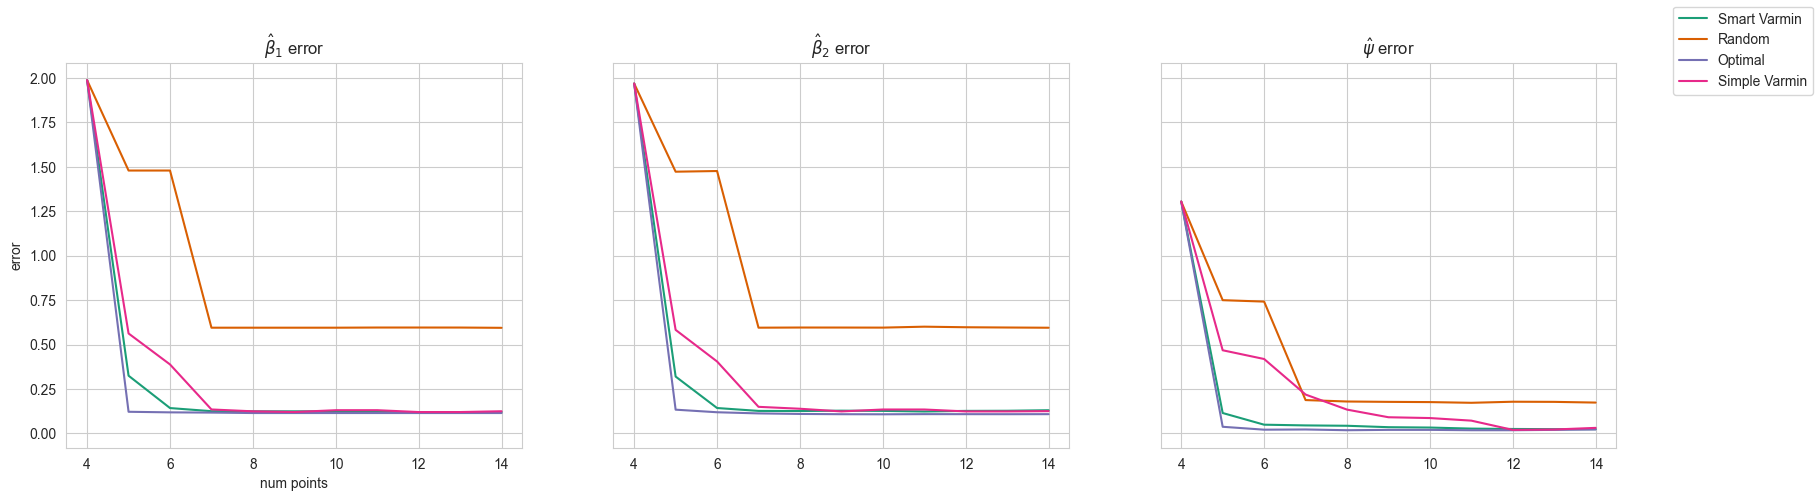

In [16]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey= True)
fig.set_figwidth(20)
fig.set_figheight(5)
axs[0].set_title('$\\hat{\\beta}_1$' ' error')
axs[0].set_ylabel('error')
axs[0].set_xlabel('num points')
axs[0].plot(range(4, num_iter + 5), mean_a1[:,0], label = "Smart Varmin")
axs[0].plot(range(4, num_iter + 5), mean_a2[:,0], label = "Random")
axs[0].plot(range(4, num_iter + 5), mean_a3[:,0], label = "Optimal")
axs[0].plot(range(4, num_iter + 5), mean_a4[:,0], label = "Simple Varmin")
axs[1].set_title('$\\hat{\\beta}_2$' ' error')
axs[1].plot(range(4, num_iter + 5), mean_a1[:,1])
axs[1].plot(range(4, num_iter + 5), mean_a2[:,1])
axs[1].plot(range(4, num_iter + 5), mean_a3[:,1])
axs[1].plot(range(4, num_iter + 5), mean_a4[:,1])
axs[2].set_title('$\\hat{\\psi}$' ' error')
axs[2].plot(range(4, num_iter + 5), mean_a1[:,2])
axs[2].plot(range(4, num_iter + 5), mean_a2[:,2])
axs[2].plot(range(4, num_iter + 5), mean_a3[:,2])
axs[2].plot(range(4, num_iter + 5), mean_a4[:,2])
fig.legend()
fig.savefig('figures/parameter_est.png', dpi=300, bbox_inches = "tight")